# <center> Tutorial: Raster manipulation with Python

In this notebook, we practice manipulating satellite imagery with python. We show how to open rasters in TIF format and manipulate formats and color channels. We also show how to manipulate GeoJSON files and shapely polygons using Geopandas, and how to plot all this stuff with the relevant libraries.

The data we used are images from the Duke dataset and polygons from an OSM extract (see corresponding notebooks for detailed analysis of Duke and OSM data).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TIF-images" data-toc-modified-id="TIF-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TIF images</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Read-TIF-as-np-array-with-OpenCV:" data-toc-modified-id="Read-TIF-as-np-array-with-OpenCV:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Read TIF as np array with <code>OpenCV</code>:</a></span></li><li><span><a href="#Read-TIF-with-rasterio-(rio)" data-toc-modified-id="Read-TIF-with-rasterio-(rio)-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Read TIF with <code>rasterio</code> (<code>rio</code>)</a></span></li><li><span><a href="#Check-image-metadata-and-coordinates" data-toc-modified-id="Check-image-metadata-and-coordinates-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Check image metadata and coordinates</a></span></li><li><span><a href="#Plot-raster" data-toc-modified-id="Plot-raster-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Plot raster</a></span></li><li><span><a href="#Reproject-raster" data-toc-modified-id="Reproject-raster-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Reproject raster</a></span></li><li><span><a href="#Change-pixel-format" data-toc-modified-id="Change-pixel-format-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Change pixel format</a></span></li><li><span><a href="#Get-subset-/-crop-raster" data-toc-modified-id="Get-subset-/-crop-raster-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>Get subset / crop raster</a></span></li><li><span><a href="#Overlay-your-raster-tile-in-folium-map" data-toc-modified-id="Overlay-your-raster-tile-in-folium-map-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>Overlay your raster tile in <code>folium</code> map</a></span></li></ul></li></ul></li><li><span><a href="#XML-files" data-toc-modified-id="XML-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XML files</a></span></li><li><span><a href="#GeoJSON-files" data-toc-modified-id="GeoJSON-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GeoJSON files</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Read-GeoJSON-with-geopandas" data-toc-modified-id="Read-GeoJSON-with-geopandas-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Read GeoJSON with <code>geopandas</code></a></span></li><li><span><a href="#Extract-polygon-shapes-and-other-information" data-toc-modified-id="Extract-polygon-shapes-and-other-information-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Extract polygon shapes and other information</a></span></li><li><span><a href="#Convert-to-GeoJSON" data-toc-modified-id="Convert-to-GeoJSON-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Convert to GeoJSON</a></span></li><li><span><a href="#Visualise-GeoJSON-with-geojsonio" data-toc-modified-id="Visualise-GeoJSON-with-geojsonio-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Visualise GeoJSON with <code>geojsonio</code></a></span></li></ul></li></ul></li><li><span><a href="#Shapely-and-Geopandas-objects" data-toc-modified-id="Shapely-and-Geopandas-objects-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shapely and Geopandas objects</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-and-plot-geodataframe" data-toc-modified-id="Create-and-plot-geodataframe-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Create and plot geodataframe</a></span></li><li><span><a href="#Create,-plot-and-convert-polygons" data-toc-modified-id="Create,-plot-and-convert-polygons-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Create, plot and convert polygons</a></span></li></ul></li></ul></li></ul></div>

In [3]:
# file manipulation imports
import pandas as pd
import os
import pickle
import json
import geojson
from geojson import Point, Feature, FeatureCollection, dump
import geopandas as gpd
from shapely.geometry import Polygon, Point, asShape, mapping, shape
from xml.etree import ElementTree
import fiona

# raster-specific imports
import cv2
import rasterio as rio
from rasterio.plot import reshape_as_image, show, plotting_extent
from rasterio.warp import calculate_default_transform, reproject, Resampling
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
import geojsonio
from pyproj import Proj, transform

## TIF images

#### Read TIF as np array with `OpenCV`:

In [3]:
im = cv2.imread('Duke/3385789_Modesto/10sfg735670.tif', -1)
im

array([[[191, 213, 220],
        [186, 203, 212],
        [192, 209, 215],
        ...,
        [121, 138, 146],
        [119, 137, 153],
        [109, 130, 139]],

       [[194, 220, 229],
        [186, 208, 216],
        [190, 209, 215],
        ...,
        [117, 137, 150],
        [123, 139, 154],
        [115, 134, 147]],

       [[193, 215, 224],
        [189, 208, 217],
        [189, 206, 214],
        ...,
        [113, 136, 147],
        [123, 136, 154],
        [117, 136, 153]],

       ...,

       [[ 85, 103,  89],
        [ 92, 108,  91],
        [ 82,  99,  63],
        ...,
        [127, 141, 144],
        [128, 134, 144],
        [125, 135, 146]],

       [[ 82, 107,  91],
        [ 81,  80,  74],
        [ 84,  95,  79],
        ...,
        [129, 141, 142],
        [128, 134, 143],
        [125, 134, 144]],

       [[ 90, 139, 109],
        [ 90, 138, 105],
        [ 95, 142, 116],
        ...,
        [133, 142, 144],
        [126, 133, 141],
        [126, 134, 144]]

#### Read TIF with `rasterio` (`rio`)

In [75]:
image1 = rio.open('../Data/Duke/3385789_Modesto/10sfg735670.tif')

In [10]:
#Storing the bands(B,G,R) in numpy array:

print(image1.count)
# sequence of band indexes
print(image1.indexes)

3
(1, 2, 3)


In [11]:
# Load the 3 bands into 2d arrays
b, g, r = image1.read()

#### Check image metadata and coordinates

In [6]:
with rio.open('../Data/Duke/3385789_Modesto/10sfg735685.tif') as src:
    raster_img = src.read() #sub-element in object stored with the "open" command
    raster_meta = src.meta #sub-element in object stored with the "open" command

In [7]:
#Checking raster shape and Meta
raster_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 5000,
 'height': 5000,
 'count': 3,
 'crs': CRS({'init': 'epsg:26910'}),
 'transform': Affine(0.3, 0.0, 673500.0,
        0.0, -0.3, 4170000.0)}

$\rightarrow$ We can observe that the crs used for this image is epsg:26910, corresponding to NAD83, the coordinate system used for the West Coast of the US (California).

In [13]:
print("Rows: {}, Columns: {}".format(image1.height, image1.width)) # height and width are raster attributes
print(raster_img.shape) # shape is for an image read as np array (what we did earlier with .read())

(3, 5000, 5000)
Rows: 5000, Columns: 5000


In [4]:
#Image dimension in projected units (e.g. meters in espg:3857)
width_in_projected_units = image1.bounds.right - image1.bounds.left
height_in_projected_units = image1.bounds.top - image1.bounds.bottom
print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 1500.0, Height: 1500.0
Rows: 5000, Columns: 5000


In [79]:
# resolution (area covered by each pixel - in crs dimensions)
image1.res

(0.3, 0.3)

Convert pixel coordinates to latitude and longitude coordinates:

In [17]:
# Upper left pixel
row_min = 0
col_min = 0
# Lower right pixel.  Rows and columns are zero indexing.
row_max = image1.height - 1
col_max = image1.width - 1
# Transform coordinates with the dataset's affine transformation.
topleft = image1.transform * (row_min, col_min)
botright = image1.transform * (row_max, col_max)
print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (673500.0, 4168500.0)
Bottom right corner coordinates: (674999.7, 4167000.3)


In [77]:
# Same with rasterio's built-in function `plotting_extent`:
print(plotting_extent(image1))

# And finally with rasterio's `bounds` attribute:
image1.bounds

(673500.0, 675000.0, 4167000.0, 4168500.0)


BoundingBox(left=673500.0, bottom=4167000.0, right=675000.0, top=4168500.0)

Convert coordinates from one crs to another using `pyproj`:

In [24]:
inProj = Proj('epsg:26910')
outProj = Proj('epsg:4326')
x1,y1 = 673500.0, 4168500.0
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

37.64727693785386 -121.0333395759108


#### Plot raster

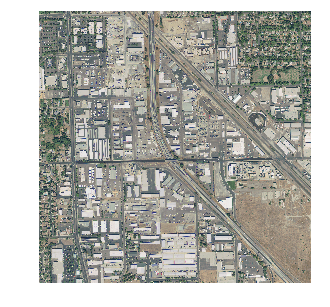

In [47]:
#Using rasterio show to plot an image in matplotlib

fig, ax = plt.subplots(1, figsize=(5, 5))
show(raster_img, ax=ax) # you have to plot the "read" object (without raster metadata)
ax.set_axis_off()
plt.show()

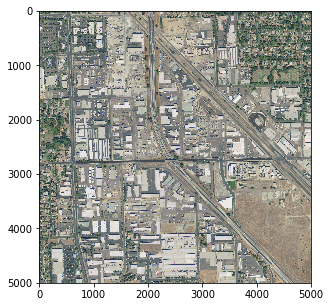

In [26]:
#Using rasterio reshape to plot an image in matplotlib
#Remark: with matplotlib you cannot directly plot a raster with several channels - this is why we use reshape
#But you can plot a single channel, as in the next cells (plotting r, g and b channels separately)

image2 = reshape_as_image(raster_img)
plt.figure(figsize=(5,5))
plt.imshow(image2)

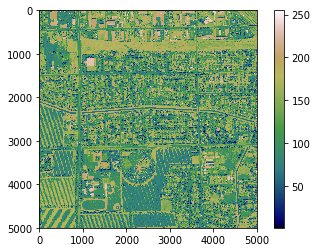

In [14]:
# Displaying the blue band from preivously loaded image
fig = plt.imshow(b)
fig.set_cmap('gist_earth')
plt.colorbar()
plt.show()

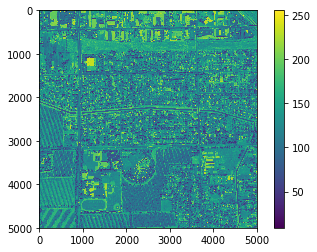

In [13]:
# Displaying the green band.
fig = plt.imshow(g)
plt.colorbar()
plt.show()

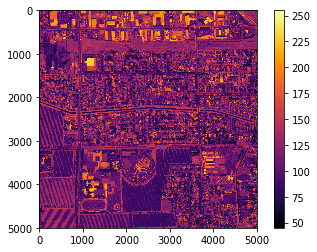

In [12]:
# Displaying the red band.
fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()

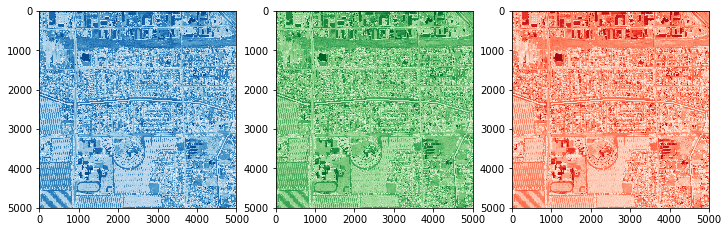

In [51]:
# plot bands with rasterio's plot.show method, in different color shades
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
show(b, ax=ax1, cmap='Blues')
show(g, ax=ax2, cmap='Greens')
show(r, ax=ax3, cmap='Reds')
plt.show()

#### Reproject raster

In [19]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # has to be written in format: 'EPSG:3857' 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

In [20]:
reproject_et(inpath = '../Data/Duke/3385789_Modesto/10sfg735685.tif', 
             outpath = '../Data/Duke/reproject_test.tif', 
             new_crs = 'EPSG:4326')

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 5677, 'height': 4514, 'count': 3, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(3.056600847892164e-06, 0.0, -121.03333957591077,
       0.0, -3.056600847892164e-06, 37.66078909788989)}


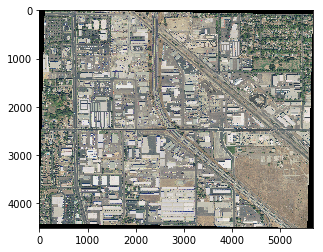

In [21]:
# check it worked
test = rio.open('../Data/Duke/reproject_test.tif')
print(test.meta)
show(test.read())
test.close()

#### Change pixel format

In [37]:
# change pixel format (convert to float32)
img3 = raster_img.astype("f4")
img3

array([[[ 73.,  71.,  72., ...,  87.,  80.,  97.],
        [ 74.,  73.,  75., ...,  80.,  76.,  93.],
        [ 75.,  75.,  74., ...,  82.,  85.,  92.],
        ...,
        [224., 222., 213., ..., 149., 153., 138.],
        [217., 221., 219., ..., 156., 150., 137.],
        [212., 214., 219., ..., 152., 150., 138.]],

       [[106., 101., 103., ..., 125., 116., 130.],
        [110., 106., 108., ..., 121., 110., 128.],
        [111., 109., 111., ..., 120., 118., 126.],
        ...,
        [214., 214., 208., ..., 137., 131., 127.],
        [208., 212., 212., ..., 139., 130., 127.],
        [205., 205., 211., ..., 139., 135., 127.]],

       [[ 93.,  91.,  88., ...,  89.,  87.,  90.],
        [ 89.,  91.,  90., ...,  85.,  84.,  87.],
        [ 89.,  89.,  90., ...,  84.,  87.,  90.],
        ...,
        [191., 193., 189., ..., 110., 112., 103.],
        [191., 190., 192., ..., 117., 112., 104.],
        [189., 185., 193., ..., 123., 118., 106.]]], dtype=float32)

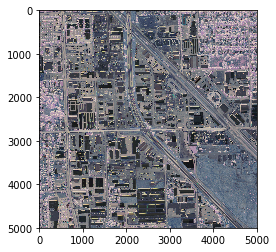

In [56]:
img3 = reshape_as_image(img3)
plt.imshow(img3);

In [55]:
# change pixel format (convert to uint8)
r_uint8 = r.astype(rasterio.uint8)
print(r_uint8.dtype)

uint8


#### Get subset / crop raster

You can crop a raster by specifying row (pixel) coordinates in rasterio's `Window` function:

In [59]:
# we use: `window(col_off, row_off, width, height)`:
src = rasterio.open('../Data/Duke/3385789_Modesto/10sfg735685.tif')
window = rasterio.windows.Window(1200, 1200, 750, 850)
subset = src.read(window=window)
subset.shape

(3, 850, 750)

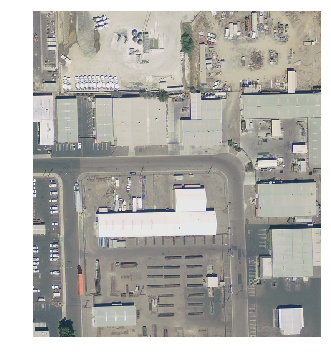

In [60]:
fig, ax = plt.subplots(1, figsize=(6, 6))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

You can also crop a raster based on coordinates stored in a geopandas dataframe (i.e. in any file type readable by geopandas, such as geojson, shp, etc.). For the cropping operation, we can use the `crop_image` function in the `earthpy.spatial` library.

epsg:4326


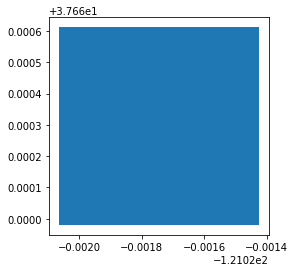

In [63]:
# Define the crop area

polygons = gpd.read_file("../Data/Duke/3385780_polygons/Modesto_polygons.geojson")
crop_area = polygons[85:86] # select a polygon corresponding to the image
crop_area = crop_area.buffer(0.0003) # add a buffer to exend the area (buffer size in espg:4326 referential)
crop_area = crop_area.envelope # build a bounding box around the polygon
print(crop_area.crs)
crop_area.plot();

In [14]:
# Load raster to crop
test = rio.open('../Data/Duke/reproject_test.tif')
test.crs

CRS({'init': 'epsg:4326'})

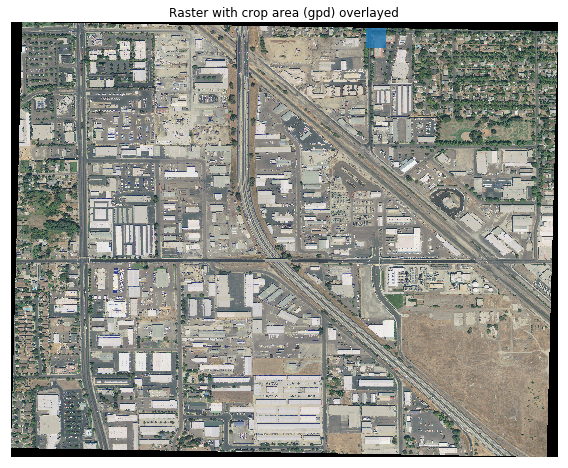

In [64]:
# Overaly raster and crop area

# Remark: I used earthpy to plot the raster because the regular rio.show
# showed the raster in a scale not corresponding with the crop_area plotting scale. 
# This could be corrected, but for simplicity it works as well with earthpy.

fig, ax = plt.subplots(figsize=(10, 8))

ep.plot_rgb(test.read(),
              extent=plotting_extent(test),
              ax=ax,
              title="Raster with crop area (gpd) overlayed")

crop_area.plot(ax=ax, alpha=.8)

ax.set_axis_off()

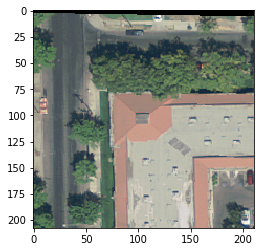

In [65]:
# crop using earthpy (making sure crs of image and crop area correspond)
crop_img, crop_meta = es.crop_image(test, crop_area)
show(crop_img);

We can see that there are, indeed, solar panels in this area.

In [ ]:
# remark: here, we crop simultaneously as loading the raster
with rio.open('../Data/Duke/reproject_test.tif') as src:
    crop_img, crop_meta = es.crop_image(src, crop_area)

Once cropped we can export it. We have to update its meta information before writing:

In [70]:
# Update the original test meta with the new cropped affine info and the new width and height
kwargs = test.meta.copy()
kwargs.update({'transform': crop_meta["transform"],
                'height': crop_img.shape[1],
                'width': crop_img.shape[2]})

kwargs

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 211,
 'height': 208,
 'count': 3,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': Affine(3.056600847892164e-06, 0.0, -121.02206683198375,
        0.0, -3.056600847892164e-06, 37.660614871641556)}

In [71]:
# Write data
with rio.open('../Data/Duke/reproject_test_crop.tif', 'w', **kwargs) as new:
    new.write(crop_img[0], 1)
    new.write(crop_img[1], 2)
    new.write(crop_img[2], 3)

#### Overlay your raster tile in `folium` map

Below is the code to overaly an image in OSM's map vizualization with `folium`. Making sure the CRS and image boundaries are correct is very tricky, but it works!

We can also plot on top of this the corresponding polygons (in my example, there is just a small offset of 1-2m).

See below:

In [70]:
# polygons corresponding to the image
poly_img = polygons[polygons['image_name']=='10sfg735685']
print(poly_img.crs)
print(poly_img.shape[0], 'polygons')
poly_img.head(1)

epsg:4326
7 polygons


,polygon_id,centroid_latitude,centroid_longitude,centroid_latitude_pixels,centroid_longitude_pixels,city,area_pixels,area_meters,image_name,nw_corner_of_image_latitude,nw_corner_of_image_longitude,se_corner_of_image_latitude,se_corner_of_image_longitude,datum,projection_zone,resolution,jaccard_index,polygon_vertices_pixels,geometry
85,14901,37.660297,-121.021745,112.757256,3308.433302,Modesto,11.540562,128.228472,10sfg735685,37.660789,-121.032983,37.646992,-121.016347,NAD83,10,0.3,0.0,"[ [ 3313.860185, 118.77060729999999 ], [ 3314....","POLYGON ((-121.02173 37.66028, -121.02172 37.6..."


In [68]:
# Careful: your raster has to be in OSM's crs, i.e. WGS84 Mercator EPSG:4326
raster_path = os.path.join('../Data/Duke/', 'reproject_test.tif')

In [ ]:
m = folium.Map(location=[37.660789,-121.032983], zoom_start=14)

if not os.path.isfile(raster_path):
    print(f'Could not find {raster_path}')
else:
    img = folium.raster_layers.ImageOverlay(
        name='Mercator projection SW',
        image=raster_path,
        bounds=[[37.660789,-121.032983],[37.646992,-121.016347]], # [[lat_min, lon_min], [lat_max, lon_max]]
        opacity=0.6,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )
    img.add_to(m) # add image to map
    
    folium.GeoJson(poly_img, name='geojson').add_to(m) # add polygons to map

    folium.LayerControl().add_to(m)
    #m.save(os.path.join('results', 'ImageOverlay_0.html'))

m

Remark that in the code above you have to specify the image bounds. These bounds can be found either in an annotation file (which is our case), or with rasterio's `plotting_extent` function (which takes a raster as argument), or with rasterio's `bounds` attribute:

In [73]:
print(test.bounds)
plotting_extent(test)

BoundingBox(left=-121.03333957591077, bottom=37.646991601662506, right=-121.01598725289729, top=37.66078909788989)


(-121.03333957591077,
 -121.01598725289729,
 37.646991601662506,
 37.66078909788989)

## XML files

Rasters may have annotations (bounding boxes, etc.) stored in a separate XML file. It is possible to parse an XML annotation file using `xml.etree` and the example function below (not useful in our use case so not adapted to our data).

In [39]:
# function to extract bounding boxes from an annotation file

def extract_boxes(filename):
	# load and parse the file
	tree = ElementTree.parse(filename)
	# get the root of the document
	root = tree.getroot()
	# extract each bounding box
	boxes = list()
	for box in root.findall('.//bounding'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	# extract image dimensions
	width = int(root.find('.//size/width').text)
	height = int(root.find('.//size/height').text)
	return boxes, width, height
 
# extract details form annotation file
boxes, w, h = extract_boxes('<file>.xml')
# summarize extracted details (w and h are width and height of photograph)
print(boxes, w, h)

## GeoJSON files

#### Read GeoJSON with `geopandas`

In [4]:
# Reading train labels with geopandas

train_df = gpd.read_file("../Data/Duke/3385780_polygons/SolarArrayPolygons.geojson")
print(len(train_df))
train_df.head(5)

19433


,polygon_id,centroid_latitude,centroid_longitude,centroid_latitude_pixels,centroid_longitude_pixels,city,area_pixels,area_meters,image_name,nw_corner_of_image_latitude,nw_corner_of_image_longitude,se_corner_of_image_latitude,se_corner_of_image_longitude,datum,projection_zone,resolution,jaccard_index,polygon_vertices_pixels,geometry
0,1,36.926310,-119.840555,107.618458,3286.151487,Fresno,136.192872,1513.254134,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.914020,"[ [ 3360.4950690000001, 131.6311637 ], [ 3249....","POLYGON ((-119.84030 36.92625, -119.84068 36.9..."
1,2,36.926477,-119.840561,45.977659,3286.352946,Fresno,155.511714,1727.907934,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.829071,"[ [ 3361.1538460000002, 69.61538462 ], [ 3217....","POLYGON ((-119.84031 36.92642, -119.84080 36.9..."
2,3,36.926542,-119.840506,22.280851,3303.465657,Fresno,111.796591,1242.184349,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.937961,"[ [ 3358.0157260000001, 48.136863220000002 ], ...","POLYGON ((-119.84032 36.92648, -119.84032 36.9..."
3,4,36.921008,-119.842847,2048.362567,2547.366116,Fresno,62.004008,688.933420,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.842634,"[ [ 2571.5917159999999, 2068.0493099999999 ], ...","POLYGON ((-119.84276 36.92096, -119.84277 36.9..."
4,5,36.920976,-119.842906,2060.014890,2529.504997,Fresno,95.480150,1060.890554,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.890998,"[ [ 2563.7810650000001, 2091.3984220000002 ], ...","POLYGON ((-119.84279 36.92089, -119.84299 36.9..."


In [29]:
# count features present in the geojson file
train_df.count()

polygon_id                      19433
centroid_latitude               19433
centroid_longitude              19433
centroid_latitude_pixels        19433
centroid_longitude_pixels       19433
city                            19433
area_pixels                     19433
area_meters                     19433
image_name                      19433
nw_corner_of_image_latitude     19433
nw_corner_of_image_longitude    19433
se_corner_of_image_latitude     19433
se_corner_of_image_longitude    19433
datum                           19433
projection_zone                 19433
resolution                      19433
jaccard_index                   19433
polygon_vertices_pixels         19433
geometry                        19433
centroid                        19433
dtype: int64

In [8]:
# Filter to keep only the rows (polygons) corresponding to Modesto rasters

train_df = train_df[train_df['city']=='Modesto']
train_df

# Other method: filtering based on image_name:
# train_df = train_df[train_df['image_name'].str.contains('10sfg')]

,polygon_id,centroid_latitude,centroid_longitude,centroid_latitude_pixels,centroid_longitude_pixels,city,area_pixels,area_meters,image_name,nw_corner_of_image_latitude,nw_corner_of_image_longitude,se_corner_of_image_latitude,se_corner_of_image_longitude,datum,projection_zone,resolution,jaccard_index,polygon_vertices_pixels,geometry
14710,14804,37.646419,-121.001768,120.907616,4292.078275,Modesto,30.191414,335.460156,10sfg750670,37.646992,-121.016347,37.633194,-120.999714,NAD83,10,0.3,0.903454,"[ [ 4306.3662979999999, 119.6673471 ], [ 4307....","POLYGON ((-121.00172 37.64642, -121.00172 37.6..."
14711,14805,37.643571,-121.002570,1179.436321,4078.479684,Modesto,51.811698,575.685529,10sfg750670,37.646992,-121.016347,37.633194,-120.999714,NAD83,10,0.3,0.000000,"[ [ 4063.6538, 1156.654888 ], [ 4056.424423999...","POLYGON ((-121.00262 37.64363, -121.00264 37.6..."
14712,14806,37.643643,-121.002560,1152.963262,4080.751410,Modesto,37.047767,411.641856,10sfg750670,37.646992,-121.016347,37.633194,-120.999714,NAD83,10,0.3,0.000000,"[ [ 4065.7280000000001, 1156.9839999999999 ], ...","POLYGON ((-121.00261 37.64363, -121.00258 37.6..."
14713,14807,37.643608,-121.002520,1165.443137,4092.815044,Modesto,36.399223,404.435808,10sfg750670,37.646992,-121.016347,37.633194,-120.999714,NAD83,10,0.3,0.000000,"[ [ 4078.172, 1169.7159999999999 ], [ 4096.988...","POLYGON ((-121.00257 37.64360, -121.00251 37.6..."
14714,14808,37.643575,-121.002480,1177.600007,4104.951365,Modesto,37.029374,411.437491,10sfg750670,37.646992,-121.016347,37.633194,-120.999714,NAD83,10,0.3,0.000000,"[ [ 4090.0412000000001, 1181.5804000000001 ], ...","POLYGON ((-121.00253 37.64356, -121.00250 37.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,15412,37.648965,-120.986336,4082.537558,3810.582810,Modesto,15.838717,175.985743,10sfg765685,37.660217,-120.998989,37.646417,-120.982361,NAD83,10,0.3,0.000000,"[ [ 3802.9850750000001, 4076.4925370000001 ], ...","POLYGON ((-120.98636 37.64898, -120.98631 37.6..."
15288,15413,37.647874,-120.985705,4482.127771,4005.033568,Modesto,18.862776,209.586396,10sfg765685,37.660217,-120.998989,37.646417,-120.982361,NAD83,10,0.3,0.000000,"[ [ 3994.6517410000001, 4477.4875620000003 ], ...","POLYGON ((-120.98574 37.64789, -120.98566 37.6..."
15289,15414,37.647495,-120.995979,4686.813748,986.132484,Modesto,14.323903,159.154476,10sfg765685,37.660217,-120.998989,37.646417,-120.982361,NAD83,10,0.3,0.000000,"[ [ 975.49751240000001, 4682.3383080000003 ], ...","POLYGON ((-120.99601 37.64751, -120.99595 37.6..."
15290,15415,37.647477,-120.995364,4689.540684,1167.217686,Modesto,29.015371,322.393010,10sfg765685,37.660217,-120.998989,37.646417,-120.982361,NAD83,10,0.3,0.000000,"[ [ 1153.7313429999999, 4683.8308459999998 ], ...","POLYGON ((-120.99541 37.64749, -120.99532 37.6..."


#### Extract polygon shapes and other information

In [27]:
#Check coordinates of a polygon (2 methods)
print(list(train_df['geometry'][0].exterior.coords))
train_df['geometry'][0].exterior.coords.xy

[(-119.84030285285368, 36.92625126752494), (-119.84068167074253, 36.92636019465177), (-119.84080234595001, 36.9263955197238), (-119.840812638602, 36.926373374881805), (-119.84080600233547, 36.926371412835486), (-119.8408066470241, 36.92636992246358), (-119.84031836310277, 36.92622672990362), (-119.84030285285368, 36.92625126752494)]


(array('d', [-119.84030285285368, -119.84068167074253, -119.84080234595001, -119.840812638602, -119.84080600233547, -119.8408066470241, -119.84031836310277, -119.84030285285368]),
 array('d', [36.92625126752494, 36.92636019465177, 36.9263955197238, 36.926373374881805, 36.926371412835486, 36.92636992246358, 36.92622672990362, 36.92625126752494]))

In [28]:
# add centroids in order to have unique coordinates for each polygon
train_df2 = train_df
train_df2['centroid'] = train_df2['geometry'].centroid
train_df2.head(1)

# we can also get separately lat and lon of centroid with:
# train_df2["centroid_lon"] = train_df2['geometry'].centroid.x
# train_df2["centroid_lat"] = train_df2['geometry'].centroid.y

,polygon_id,centroid_latitude,centroid_longitude,centroid_latitude_pixels,centroid_longitude_pixels,city,area_pixels,area_meters,image_name,nw_corner_of_image_latitude,nw_corner_of_image_longitude,se_corner_of_image_latitude,se_corner_of_image_longitude,datum,projection_zone,resolution,jaccard_index,polygon_vertices_pixels,geometry,centroid
0,1,36.92631,-119.840555,107.618458,3286.151487,Fresno,136.192872,1513.254134,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.91402,"[ [ 3360.4950690000001, 131.6311637 ], [ 3249....","POLYGON ((-119.84030 36.92625, -119.84068 36.9...",POINT (-119.84056 36.92631)


In [8]:
#function to check if a given point is located inside a given polygon
def point_inside_polygon(lat,lng,poly):
    n = len(poly)
    inside =False
    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if lat > min(p1y,p2y):
            if lat <= max(p1y,p2y):
                if lng <= max(p1x,p2x):
                    if p1y != p2y:
                        xinters = (lat-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or lng <= xinters:
                        inside = not inside
        p1x,p1y = p2x,p2y
    return inside

#### Convert to GeoJSON

Dumping a list of features directly with `to_json` or a simple `dump` does not create a valid GeoJSON file (see below).

In [9]:
#convert geodataframe to simple json file
train_df_geo = train_df.to_json()

# write to disk
with open('../Data/Duke/3385780_polygons/Modesto_polygons.json', 'w') as f:
    dump(train_df_geo, f)

To create a valid GeoJSON, the long way is to organize the geometries using the proper GeoJSON architecture. See the example function below which goes through the following steps:
* Create a list of features (where each feature has geometry and optional properties)
* Create a collection (e.g. FeatureCollection) with those features
* Dump the collection to a file.

In [ ]:
def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Point((X["long"],
                                                    X["lat"],
                                                    X["elev"])),
                            properties=dict(name=X["name"],
                                            description=X["description"])))
    df.apply(insert_features, axis=1)
    with open('map1.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)


The short way, much easier, is to use `fiona` (make sure to `import fiona`):

In [16]:
# Convert to GeoJSON using fiona's GeoJSON driver
train_df.to_file('../Data/Duke/3385780_polygons/Modesto_polygons.geojson', driver='GeoJSON')

#### Visualise GeoJSON with `geojsonio`

In [ ]:
#visualise geojson in browser
geojsonio.display(train_df_geo)

## Shapely and Geopandas objects

We show functions to manipulate and plot shapely points and polygons, based on data extracted from OSM (see corresponding notebook).

#### Create and plot geodataframe

In [12]:
# open pickle file
with open('../Data/OSM_coord/uk_panels.pkl', 'rb') as f:
             osm_queried_panels = pickle.load(f)

In [9]:
# Convert to dataframe
osm_df = pd.DataFrame(osm_queried_panels)
osm_df.head(1)

,type,id,nodes,tags,lat,lon
0,way,21819997,"[235214393, 718952965, 718952985, 718952926, 7...","{'PMSA_ref': 'WMbiBIxx207', 'architect': 'Faul...",NaN,NaN


In [10]:
# Convert to geo dataframe
osm_df['geometry'] = list(zip(osm_df['lon'], osm_df['lat']))
osm_df['geometry'] = osm_df['geometry'].apply(lambda x: Point(x))
osm_df = gpd.GeoDataFrame(osm_df, crs={'init': 'epsg:4326'}) # OSM comes in this coordinate system
osm_df.head(1)

,type,id,nodes,tags,lat,lon,geometry
0,way,21819997,"[235214393, 718952965, 718952985, 718952926, 7...","{'PMSA_ref': 'WMbiBIxx207', 'architect': 'Faul...",NaN,NaN,POINT (nan nan)


In [11]:
# Change crs (British National Grid) for plotting
osm_bng = osm_df.to_crs({'init':'epsg:27700'})

In [13]:
# Grab UK outline (crs epsg:4326) and change to BNG coordinates
gb_outline = gpd.read_file('../Data/OSM_coord/GBR_adm/GBR_adm1.shp').to_crs({'init':'epsg:27700'})

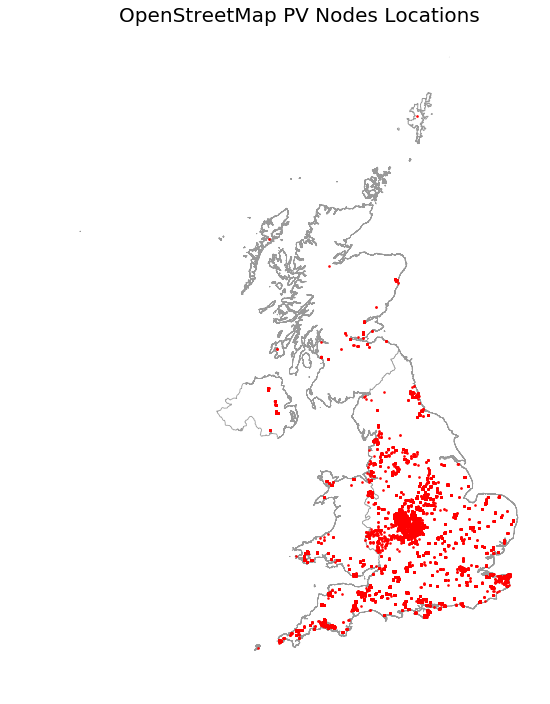

In [14]:
# Plot (static)
fig, ax = plt.subplots(1, figsize=(12, 12))
gb_outline.plot(ax=ax, color='white', linewidth=0.8, edgecolor='0.6')
osm_bng.plot(ax=ax, markersize=2, color='red', alpha=0.4)

ax.set_title("OpenStreetMap PV Nodes Locations", fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.axis('off')
plt.show()

In [ ]:
# Plot (interactive), with folium
# The popups attribute makes sure we can click on points to see coordinates

# Store all nodes coordinates for plotting
osm_folium = osm_df[osm_df.lat.notna()]
print(len(osm_folium))
osm_folium.head(1)

# Plot
m = folium.Map([50.751, -1.9950], zoom_start=6, tiles='cartodbpositron')
# other possible tile styles: ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

locations = []
popups = []
for idx, row in osm_folium[:10000].iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    popups.append((row['geometry'].y, row['geometry'].x))

s = folium.FeatureGroup(name='Solar PV')
s.add_children(MarkerCluster(locations=locations, popups=popups))
m.add_children(s)
m.add_child(folium.LatLngPopup())

#### Create, plot and convert polygons

In [19]:
# convert summit coordinates to Polygon shapely object
summits = [[52.460309, -1.8446924], [52.4601234, -1.8443053], [52.4601571, -1.8442619], [52.4600219, -1.8439798], [52.4600585, -1.8439325], [52.4599617, -1.8437306], [52.4600288, -1.8436439], [52.4599427, -1.8434643], [52.4595284, -1.8439991], [52.4595503, -1.8440447], [52.4594302, -1.8441997], [52.4594666, -1.8442756], [52.4595603, -1.8441546], [52.4596269, -1.8442934], [52.4594333, -1.8445433], [52.4594825, -1.844646], [52.4596214, -1.8444667], [52.4597635, -1.844763], [52.4598029, -1.8447121], [52.4599905, -1.8451036], [52.460309, -1.8446924]]
polygon = Polygon(summits)
print(type(polygon))
print(polygon)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((52.460309 -1.8446924, 52.4601234 -1.8443053, 52.4601571 -1.8442619, 52.4600219 -1.8439798, 52.4600585 -1.8439325, 52.4599617 -1.8437306, 52.4600288 -1.8436439, 52.4599427 -1.8434643, 52.4595284 -1.8439991, 52.4595503 -1.8440447, 52.4594302 -1.8441997, 52.4594666 -1.8442756, 52.4595603 -1.8441546, 52.4596269 -1.8442934, 52.4594333 -1.8445433, 52.4594825 -1.844646, 52.4596214 -1.8444667, 52.4597635 -1.844763, 52.4598029 -1.8447121, 52.4599905 -1.8451036, 52.460309 -1.8446924))


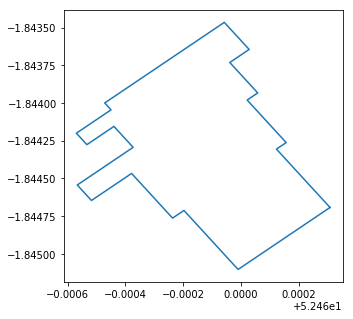

In [20]:
# plot shapely object
plt.figure(figsize=(5,5))
plt.plot(*polygon.exterior.xy)
plt.show()

In [21]:
# convert shapely object to geodataframe
polygon_geo = gpd.GeoDataFrame(index=[0], crs={'init': 'epsg:4326'}, geometry=[polygon])
type(polygon_geo)

geopandas.geodataframe.GeoDataFrame

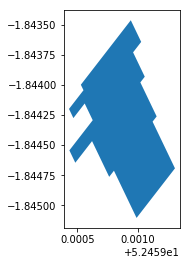

In [22]:
# plot geodataframe with axes
polygon_geo.plot()
plt.show()

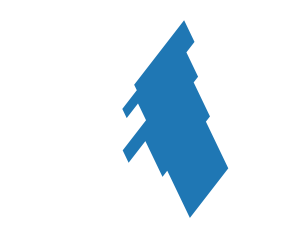

In [23]:
# plot geodataframe without axes
f, ax = plt.subplots(1, figsize=(4, 4))
ax = polygon_geo.plot(axes=ax)
ax.set_axis_off() # to remove axes
lims = plt.axis('equal') # to center / not distort the shape
plt.show()

In [31]:
# convert back geodataframe row to shapely polygon
polygon = None
for i in polygon_geo['geometry'][0:1]:
    polygon = i
type(polygon)

shapely.geometry.polygon.Polygon

We could then use folium to plot the polygon directly on a map, or convert the geodataframe to geojson format and plot it using geojsonio (see previous sections).